# Unsupervised models

In this notebook, we will indulge into different unsupervised models.

So far, this includes kmeans. We will be using the library of scikitlearn to do this.

Starting off with some basic imports. 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Models
from sklearn.cluster import KMeans

#Feature selections
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

#metrics and nice visualization
from sklearn.metrics import f1_score, confusion_matrix
from tqdm import tqdm

# setting random seed for reproducibility
random_state=98127480

Then we can read the preprocessed data by using pandas library. 

In [2]:
X = pd.read_csv('preprocessed_data/X.csv')
y = pd.read_csv('preprocessed_data/target.csv')
data = pd.read_csv('preprocessed_data/data.csv')
X.head()

,rA,rB,MA,MB,dAO,dBO,rA/rO,rB/rO,t
0,1.46,0.76,65,86,1.805,2.060,1.081,0.563,0.942
1,1.46,0.47,65,95,1.805,1.840,1.081,0.348,1.092
2,1.46,0.13,65,82,1.805,1.432,1.081,0.096,1.343
3,1.46,0.38,65,83,1.805,1.604,1.081,0.281,1.149
4,1.46,0.60,65,85,1.805,1.942,1.081,0.444,1.019


# A model for predicting perovskite or not

To begin with, we would like to validate the algorithm on the training data.

In [36]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE


def runUnsupervisedModel(X, n_clusters = 4, preprocessing = False):

    if preprocessing == True:
        # Project the data: this step will take several seconds
        tsne = TSNE(n_components=2, init='random', random_state=0)
        digits_proj = tsne.fit_transform(X)
        print(digits_proj.shape)
        print(X)
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    
        clusters = kmeans.fit_predict(digits_proj)
        kmeans.cluster_centers_.shape
    
        labels = np.zeros_like(clusters)
        for i in range(10):
            mask = (clusters == i)
            labels[mask] = mode(y.values.reshape(-1,)[mask])[0]
      
        print(accuracy_score(y, labels))
        return labels
    
    sklearn_pca = PCA(n_components = 2)
    Y_sklearn = sklearn_pca.fit_transform(X)
    
    #kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in n_clusters]
    score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

    return score

number_clusters = range(1, 10)
score = runUnsupervisedModel(X, n_clusters = number_clusters)
print(score)

[409861.81073791947, 203059.14741361764, 129200.5805859625, 96384.26479251862, 65703.08930952329, 46279.73470603934, 38027.25038409545, 34188.11168943404, 31018.292437134343]


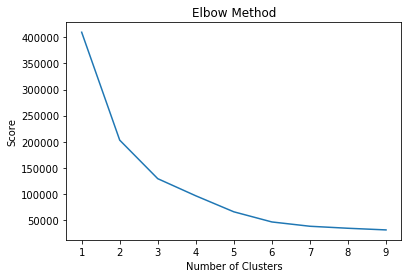

In [37]:
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

(390, 2)
        rA     rB  MA  MB    dAO    dBO  rA/rO  rB/rO      t
0    1.460  0.760  65  86  1.805  2.060  1.081  0.563  0.942
1    1.460  0.470  65  95  1.805  1.840  1.081  0.348  1.092
2    1.460  0.130  65  82  1.805  1.432  1.081  0.096  1.343
3    1.460  0.380  65  83  1.805  1.604  1.081  0.281  1.149
4    1.460  0.600  65  85  1.805  1.942  1.081  0.444  1.019
..     ...    ...  ..  ..    ...    ...    ...    ...    ...
385  1.196  0.645  12  52  2.014  1.732  0.886  0.478  0.902
386  1.196  0.600  12  61  2.014  1.750  0.886  0.444  0.923
387  1.196  0.745  12  11  2.014  1.849  0.886  0.552  0.859
388  1.196  0.670  12  43  2.014  1.791  0.886  0.496  0.891
389  1.196  0.640  12  46  2.014  1.749  0.886  0.474  0.905

[390 rows x 9 columns]
0.7692307692307693


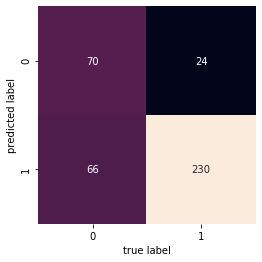

In [38]:
# kmeans with 2 clusters and comparing with the true labels. 

labels = runUnsupervisedModel(X, preprocessing = True)

from sklearn.metrics import confusion_matrix
import seaborn as sns 
mat = confusion_matrix(y.values.reshape(-1,), labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1],
            yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [39]:
fig = go.Figure(data=go.Scattergl(x=data["t"], 
                                y=data["rB/rO"], 
                                mode='markers',
                                marker_color=data['Perovskite'],
                                text=data['Compound'],
                               line_width=1),
                layout = go.Layout (
                    title=go.layout.Title(text='Features used in model'),
                    yaxis=dict(title="Tolerance factor"),
                    xaxis=dict(title="rB/rO")))
fig.show()

# Using an unsupervised algorithm on unlabeled data

In [42]:
allFeatures = ["rA", "rB", "MA", "MB", "dAO", "dBO", "rA/rO", "rB/rO", "t"]

testData = pd.read_csv('../../data/625TestData.csv')
testData

,Compound,Aatom,Batom,rA,rB,MA,MB,dAO,dBO,rA/rO,rB/rO,t
0,AgIO3,Ag,I,1.460,0.950,65,96,1.805,2.003,1.081,0.704,0.863858
1,AgPaO3,Ag,Pa,1.460,0.780,65,18,1.805,2.110,1.081,0.578,0.932785
2,AgReO3,Ag,Re,1.460,0.580,65,54,1.805,1.860,1.081,0.430,1.029416
3,AgUO3,Ag,U,1.460,0.760,65,20,1.805,2.075,1.081,0.563,0.941624
4,AgWO3,Ag,W,1.460,0.620,65,51,1.805,1.890,1.081,0.459,1.008520
...,...,...,...,...,...,...,...,...,...,...,...,...
620,ScYbO3,Sc,Yb,0.870,0.868,11,39,1.849,1.954,0.644,0.643,0.707744
621,ScYO3,Sc,Y,0.870,0.900,11,12,1.849,2.014,0.644,0.667,0.697681
622,ErLaO3,Er,La,1.179,1.032,35,13,1.979,2.148,0.873,0.764,0.750733
623,HoLaO3,Ho,La,1.194,1.032,33,13,1.992,2.148,0.884,0.764,0.755185


In [43]:
def runUnsupervisedModel(X, n_clusters = 4, preprocessing = False):
  
    #kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    kmeans = [KMeans(n_clusters=i, max_iter = 200) for i in n_clusters]
    score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

    return score

In [44]:
number_clusters = range(1, 10)
score = runUnsupervisedModel(testData[chosenFeatures], n_clusters = number_clusters)

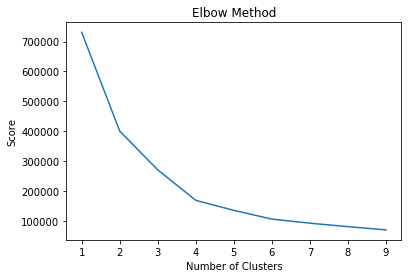

In [45]:
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

From the "elbow plot" we see a distinguishable elbow at both 2 and 4 clusters, with the latter being more distinct. Thus, we continue with 4 clusters. 

In [51]:
kmeans = KMeans(n_clusters=4, random_state=random_state).fit(testData[allFeatures])

In [52]:
Summary = pd.DataFrame({})
Summary["Compound"] = testData["Compound"]
Summary["KM labels"] = kmeans.labels_
Summary

,Compound,KM labels
0,AgIO3,2
1,AgPaO3,1
2,AgReO3,2
3,AgUO3,1
4,AgWO3,2
...,...,...
620,ScYbO3,3
621,ScYO3,3
622,ErLaO3,3
623,HoLaO3,3


In [69]:
Summary.to_csv("summary/625UnsupervisedPredictions.csv", sep=",", index = False)